In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [2]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [3]:
df = pd.DataFrame(lista_alumnos, columns = ['Nombre', 'Edad', 'Altura'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


In [5]:
df.describe()

,Edad,Altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


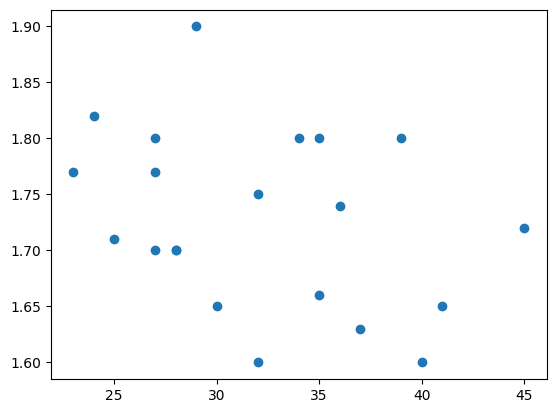

In [6]:
plt.scatter(df['Edad'], df['Altura'])

<Axes: xlabel='Edad', ylabel='Altura'>

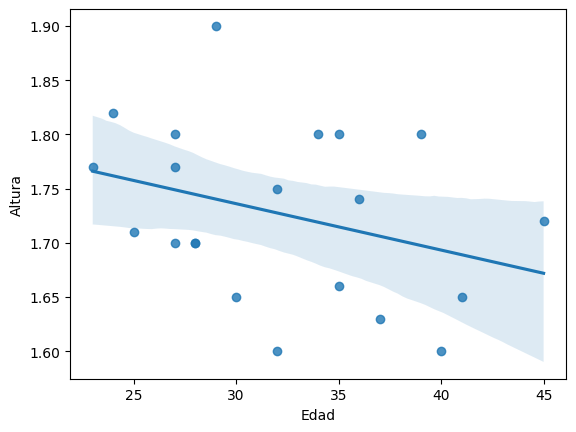

In [7]:
sns.regplot(x = df['Edad'], y =df['Altura'] ) 

<Axes: >

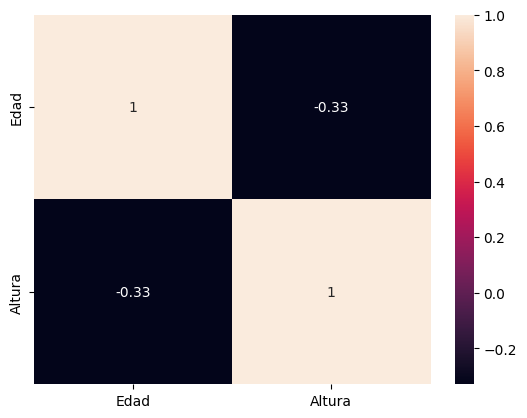

In [ ]:
sns.heatmap(df.corr(numeric_only =True), annot=True)

In [25]:
df.corr

<bound method DataFrame.corr of          Nombre  Edad  Altura
0    Leonardo S    24    1.82
1       Piero T    25    1.71
2       Marta B    35    1.66
3      Silvia P    37    1.63
4        Faro Z    29    1.90
5      Miguel N    27    1.80
6   Alejandro M    28    1.70
7    Cristina M    32    1.60
8   Francisco P    36    1.74
9       Jorge D    45    1.72
10      Jesús L    41    1.65
11      Marta G    30    1.65
12   Jennifer S    40    1.60
13      Diego I    39    1.80
14    Antonio C    23    1.77
15       Juan M    32    1.75
16      David S    27    1.70
17    Antonio J    34    1.80
18     Carlos H    27    1.77
19       Erik U    28    1.70
20     Marcos L    35    1.80>

### Entrena un modelo de regresión lineal

In [9]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [10]:
X = df[['Edad']]
y = df['Altura']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2, random_state = 42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(5, 1)
(16,)
(5,)


In [ ]:
lr = LinearRegression()


In [14]:
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#y = a + b*x  
#altura = a + b * Edad 

In [15]:
lr.intercept_

np.float64(1.858051298091961)

In [16]:
lr.coef_

array([-0.00435721])

In [18]:
edad = 31 
altura = 1.858 - 0.0043 * edad
print(altura)

1.7247000000000001


In [19]:
lr.predict([[31], [40],[20]])

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.72297779, 1.6837629 , 1.7709071 ])

In [21]:
y_pred = lr.predict(X_test)

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score 

In [22]:
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred) ** (1/2))
print("MAPE", mean_absolute_percentage_error(y_test, y_pred))
print("r2_score", r2_score(y_test, y_pred))

MAE 0.05318486080700664
MSE 0.0033126493607306537
RMSE 0.057555619714591326
MAPE 0.029943007687355166
r2_score -1.0398087196617292
